# Wrangling

Se realizará el tratamiento adecuado a las variables para mantener un dataset limpio.


In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
raw_diesel = pd.read_csv(r"C:\Users\andre\OneDrive\Escritorio\USFQ\Fundamentos en Ciencia de Datos\Proyeccion_Consumo_Diesel\dataset\raw0_Consumo_Diesel.csv", sep=";")
raw_diesel.head()

,FECHA,DISPENSADOR,HORA,VEHICULO,FLOTA,GALONES,KILOMETRAJE
0,2020-01-01,1,10:35:00,S024,B12M,"53,568","411475,8"
1,2020-01-01,1,12:12:00,S029,B12M,"54,197","479353,4"
2,2020-01-01,1,12:20:00,S011,B12M,"56,556","463696,8"
3,2020-01-01,1,13:10:00,S074,B12M,"65,614","451279,5"
4,2020-01-01,1,13:30:00,S015,B12M,"42,879","418781,5"


In [49]:
raw_diesel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228209 entries, 0 to 228208
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   FECHA        228209 non-null  object
 1   DISPENSADOR  228209 non-null  int64 
 2   HORA         228202 non-null  object
 3   VEHICULO     228207 non-null  object
 4   FLOTA        193574 non-null  object
 5   GALONES      228209 non-null  object
 6   KILOMETRAJE  227988 non-null  object
dtypes: int64(1), object(6)
memory usage: 12.2+ MB


Realizamos la eliminación de espacioes antes y después de los textos, adicionalmente eliminamos datos duplicados.

In [50]:
raw_diesel = raw_diesel.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
raw_diesel = raw_diesel.drop_duplicates()
raw_diesel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228208 entries, 0 to 228208
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   FECHA        228208 non-null  object
 1   DISPENSADOR  228208 non-null  int64 
 2   HORA         228201 non-null  object
 3   VEHICULO     228206 non-null  object
 4   FLOTA        193573 non-null  object
 5   GALONES      228208 non-null  object
 6   KILOMETRAJE  227987 non-null  object
dtypes: int64(1), object(6)
memory usage: 13.9+ MB


Eliminación de valores NaN o vacíos.

In [51]:
raw_diesel = raw_diesel.dropna(subset=['FECHA', 'DISPENSADOR', 'HORA', 'VEHICULO', 'GALONES', 'KILOMETRAJE', 'FLOTA'])
raw_diesel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193437 entries, 0 to 228208
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   FECHA        193437 non-null  object
 1   DISPENSADOR  193437 non-null  int64 
 2   HORA         193437 non-null  object
 3   VEHICULO     193437 non-null  object
 4   FLOTA        193437 non-null  object
 5   GALONES      193437 non-null  object
 6   KILOMETRAJE  193437 non-null  object
dtypes: int64(1), object(6)
memory usage: 11.8+ MB


Empezamos con la estandarización de las variables por ejemplo en KILOMETRAJE encuentras valores con separadores de miles (9.987,654), lo que primero se debe hacer es reemplazar los "." por "" (eliminarlos) y luego para representar un flotante la notación es en "." debemos reemplazar la "," por punto, y como los valores están registrados como tipo string, se los cenvertirá a flotantes.

In [52]:
raw_diesel['KILOMETRAJE'] = raw_diesel['KILOMETRAJE'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
raw_diesel['KILOMETRAJE'] = pd.to_numeric(raw_diesel['KILOMETRAJE'], errors='coerce')
raw_diesel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193437 entries, 0 to 228208
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   FECHA        193437 non-null  object 
 1   DISPENSADOR  193437 non-null  int64  
 2   HORA         193437 non-null  object 
 3   VEHICULO     193437 non-null  object 
 4   FLOTA        193437 non-null  object 
 5   GALONES      193437 non-null  object 
 6   KILOMETRAJE  193391 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 11.8+ MB


Eliminamos valores que no se pudieron convertir yse registraron como NaN

In [53]:
raw_diesel = raw_diesel.dropna(subset=['KILOMETRAJE', 'DISPENSADOR', 'GALONES'])
raw_diesel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193391 entries, 0 to 228208
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   FECHA        193391 non-null  object 
 1   DISPENSADOR  193391 non-null  int64  
 2   HORA         193391 non-null  object 
 3   VEHICULO     193391 non-null  object 
 4   FLOTA        193391 non-null  object 
 5   GALONES      193391 non-null  object 
 6   KILOMETRAJE  193391 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 11.8+ MB


Transformamos las fechas en los formatos correctos y eliminamos las que no se lograon convertir.

In [54]:
raw_diesel['FECHA'] = pd.to_datetime(raw_diesel['FECHA'], errors='coerce')
raw_diesel = raw_diesel.dropna(subset=['FECHA'])
raw_diesel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193391 entries, 0 to 228208
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   FECHA        193391 non-null  datetime64[ns]
 1   DISPENSADOR  193391 non-null  int64         
 2   HORA         193391 non-null  object        
 3   VEHICULO     193391 non-null  object        
 4   FLOTA        193391 non-null  object        
 5   GALONES      193391 non-null  object        
 6   KILOMETRAJE  193391 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 11.8+ MB


Generamos una nueva columna con el nombre de ANIO el cual nos facilitará la visualización de la información.

In [55]:
raw_diesel['ANIO'] = raw_diesel['FECHA'].dt.year
raw_diesel.head()

,FECHA,DISPENSADOR,HORA,VEHICULO,FLOTA,GALONES,KILOMETRAJE,ANIO
0,2020-01-01,1,10:35:00,S024,B12M,"53,568",411475.8,2020
1,2020-01-01,1,12:12:00,S029,B12M,"54,197",479353.4,2020
2,2020-01-01,1,12:20:00,S011,B12M,"56,556",463696.8,2020
3,2020-01-01,1,13:10:00,S074,B12M,"65,614",451279.5,2020
4,2020-01-01,1,13:30:00,S015,B12M,"42,879",418781.5,2020


Guardamos el dataset depurado

In [57]:
#raw_diesel.to_csv(r"C:\Users\andre\OneDrive\Escritorio\USFQ\Fundamentos en Ciencia de Datos\Proyeccion_Consumo_Diesel\dataset\Consumo_Diesel_Limpio.csv", index=False)
med_diesel = pd.read_csv(r"C:\Users\andre\OneDrive\Escritorio\USFQ\Fundamentos en Ciencia de Datos\Proyeccion_Consumo_Diesel\dataset\interim_Consumo_Diesel.csv")
med_diesel.head()

,FECHA,DISPENSADOR,HORA,VEHICULO,FLOTA,GALONES,KILOMETRAJE,ANIO
0,2020-01-01,1,10:35:00,S024,B12M,"53,568",411475.8,2020
1,2020-01-01,1,12:12:00,S029,B12M,"54,197",479353.4,2020
2,2020-01-01,1,12:20:00,S011,B12M,"56,556",463696.8,2020
3,2020-01-01,1,13:10:00,S074,B12M,"65,614",451279.5,2020
4,2020-01-01,1,13:30:00,S015,B12M,"42,879",418781.5,2020


In [58]:
med_diesel['FECHA'] = pd.to_datetime(med_diesel['FECHA'], errors='coerce')
med_diesel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193391 entries, 0 to 193390
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   FECHA        193391 non-null  datetime64[ns]
 1   DISPENSADOR  193391 non-null  int64         
 2   HORA         193388 non-null  object        
 3   VEHICULO     193391 non-null  object        
 4   FLOTA        193391 non-null  object        
 5   GALONES      193391 non-null  object        
 6   KILOMETRAJE  193391 non-null  float64       
 7   ANIO         193391 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 11.8+ MB


# Visualización de la Información

Visualizamos los gráficos obtenidos 

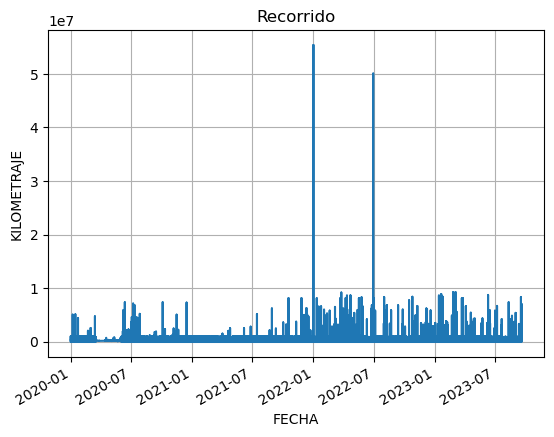

In [59]:
med_diesel['FECHA'] = pd.to_datetime(med_diesel['FECHA'], errors='coerce')
med_diesel.set_index('FECHA', inplace=True)
med_diesel = med_diesel.sort_index()
med_diesel['KILOMETRAJE'].plot(title= 'Recorrido', xlabel= 'FECHA', ylabel='KILOMETRAJE')
plt.grid(True)
plt.show()

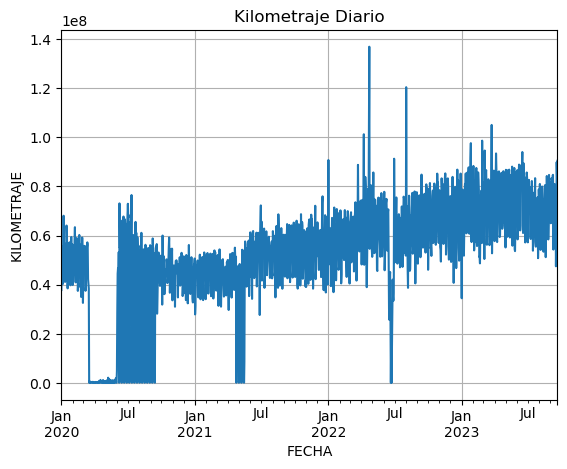

In [60]:
med_diesel_diario = med_diesel['KILOMETRAJE'].resample('1D').sum()
med_diesel_diario.plot(title = 'Kilometraje Diario', xlabel = 'FECHA', ylabel = 'KILOMETRAJE')
plt.grid(True)
plt.show()

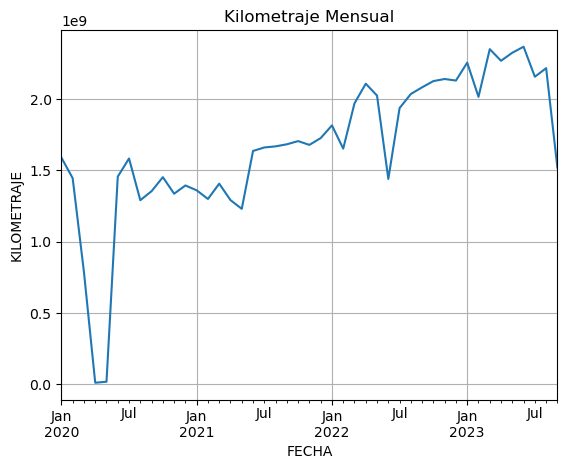

In [61]:
med_diesel_mensual = med_diesel['KILOMETRAJE'].resample('1ME').sum()
med_diesel_mensual.plot(title = 'Kilometraje Mensual', xlabel = 'FECHA', ylabel = 'KILOMETRAJE')
plt.grid(True)
plt.show()

Trnasformamos los galones a datos de tipo flotante

In [62]:
med_diesel['GALONES'] = med_diesel['GALONES'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
med_diesel['GALONES'] = pd.to_numeric(med_diesel['GALONES'], errors='coerce')
med_diesel.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 193391 entries, 2020-01-01 to 2023-09-20
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   DISPENSADOR  193391 non-null  int64  
 1   HORA         193388 non-null  object 
 2   VEHICULO     193391 non-null  object 
 3   FLOTA        193391 non-null  object 
 4   GALONES      193388 non-null  float64
 5   KILOMETRAJE  193391 non-null  float64
 6   ANIO         193391 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 11.8+ MB


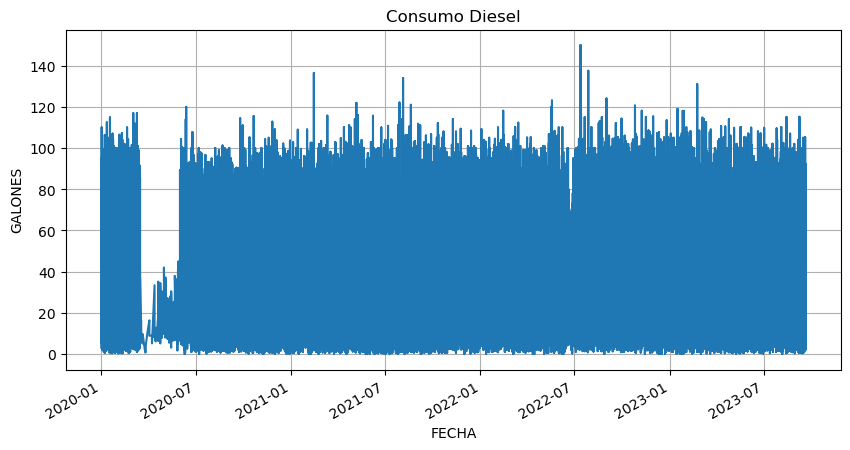

In [63]:
med_diesel['GALONES'].plot(title='Consumo Diesel', xlabel='FECHA', ylabel='GALONES', figsize=(10,5))
plt.grid(True)
plt.show()

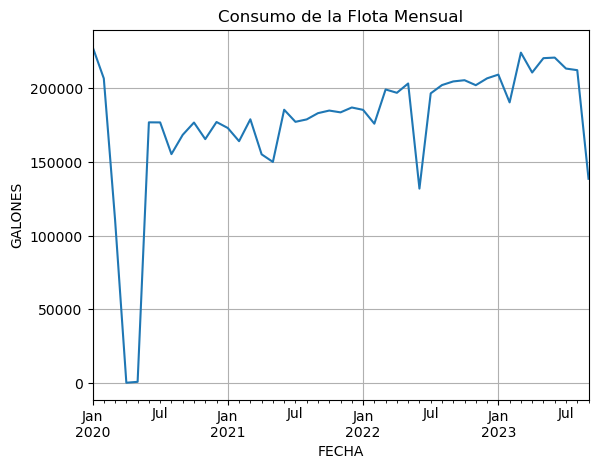

In [64]:
med_diesel_gal_mensual = med_diesel['GALONES'].resample('1ME').sum()
med_diesel_gal_mensual.plot(title = 'Consumo de la Flota Mensual', xlabel = 'FECHA', ylabel = 'GALONES')
plt.grid(True)
plt.show()

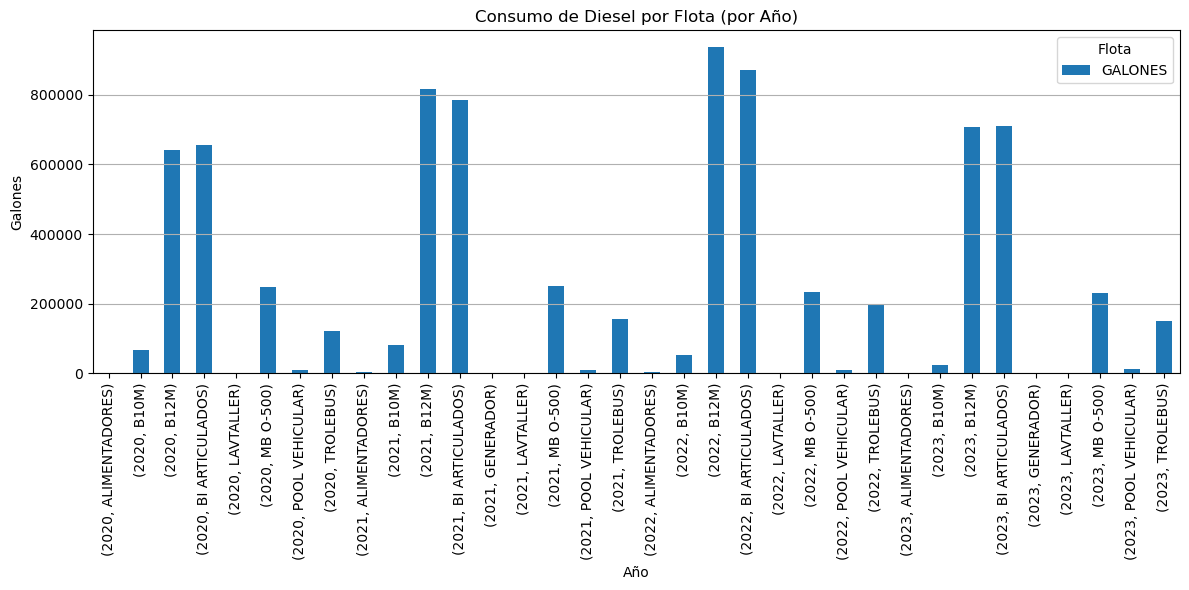

In [65]:
consumo_por_flota = med_diesel.groupby([med_diesel['ANIO'], 'FLOTA'])['GALONES'].sum()
consumo_por_flota.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Consumo de Diesel por Flota (por Año)')
plt.xlabel('Año')
plt.ylabel('Galones')
plt.legend(title='Flota')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [66]:
consumo_periodo_2020 = med_diesel.loc['2020-01-01':'2020-12-31']
consumo_periodo_2020.head()

,DISPENSADOR,HORA,VEHICULO,FLOTA,GALONES,KILOMETRAJE,ANIO
FECHA,,,,,,,
2020-01-01,1,10:35:00,S024,B12M,53.568,411475.8,2020
2020-01-01,5,14:20:00,S071,B12M,36.648,509827.1,2020
2020-01-01,5,13:30:00,V034,BI ARTICULADOS,38.075,173621.0,2020
2020-01-01,5,13:10:00,V035,BI ARTICULADOS,23.751,192267.0,2020
2020-01-01,5,13:00:00,S004,B12M,45.912,358050.2,2020


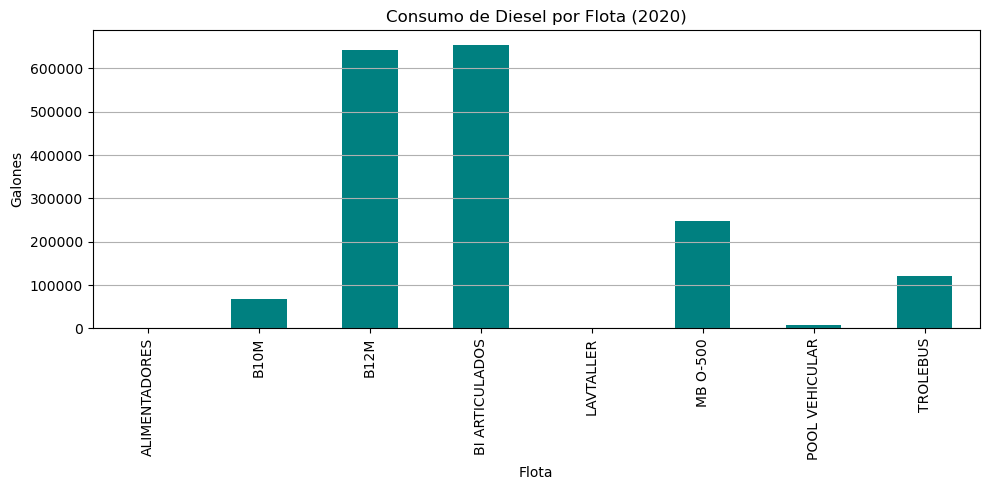

In [67]:
consumo_periodo_flota = consumo_periodo_2020.groupby('FLOTA')['GALONES'].sum()
consumo_periodo_flota.plot(kind='bar', figsize=(10,5), color='teal')
plt.title('Consumo de Diesel por Flota (2020)')
plt.xlabel('Flota')
plt.ylabel('Galones')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [68]:
consumo_periodo_2021 = med_diesel.loc['2021-01-01':'2021-12-31']
consumo_periodo_2021.head()


,DISPENSADOR,HORA,VEHICULO,FLOTA,GALONES,KILOMETRAJE,ANIO
FECHA,,,,,,,
2021-01-01,5,15:05:00,S006,B12M,50.923,367756.8,2021
2021-01-01,5,13:05:00,V040,BI ARTICULADOS,64.005,192051.4,2021
2021-01-01,5,14:41:00,S070,B12M,60.001,497680.0,2021
2021-01-01,5,14:20:00,V033,BI ARTICULADOS,53.000,233129.5,2021
2021-01-01,5,14:15:00,V019,BI ARTICULADOS,43.003,194171.9,2021


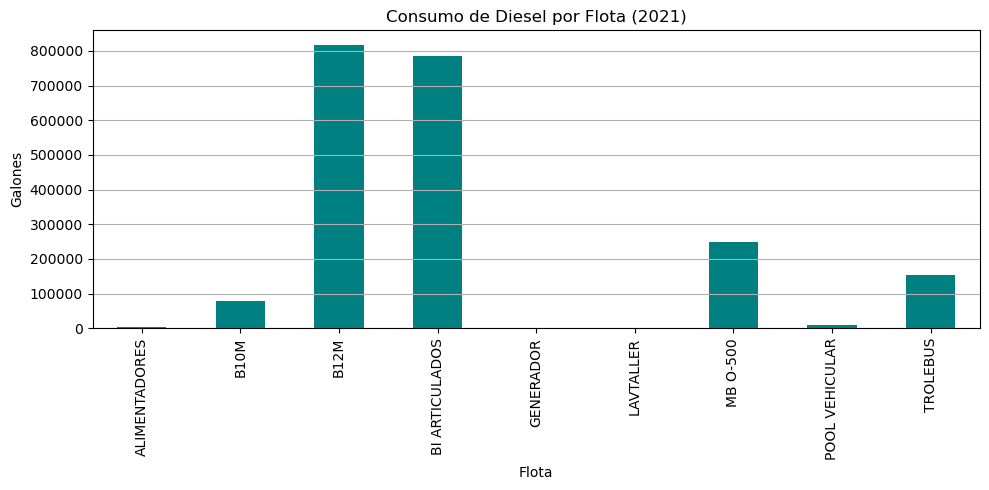

In [69]:
consumo_periodo_flota = consumo_periodo_2021.groupby('FLOTA')['GALONES'].sum()
consumo_periodo_flota.plot(kind='bar', figsize=(10,5), color='teal')
plt.title('Consumo de Diesel por Flota (2021)')
plt.xlabel('Flota')
plt.ylabel('Galones')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [70]:
consumo_periodo_2022 = med_diesel.loc['2022-01-01':'2022-12-31']
consumo_periodo_2022.head()

,DISPENSADOR,HORA,VEHICULO,FLOTA,GALONES,KILOMETRAJE,ANIO
FECHA,,,,,,,
2022-01-01,5,14:25:00,S053,B12M,36.0,544744.0,2022
2022-01-01,5,13:05:00,V022,BI ARTICULADOS,68.0,276076.6,2022
2022-01-01,5,11:35:00,S058,B12M,74.0,494735.0,2022
2022-01-01,5,11:15:00,V071,BI ARTICULADOS,76.0,184498.0,2022
2022-01-01,5,11:00:00,V034,BI ARTICULADOS,70.0,265823.0,2022


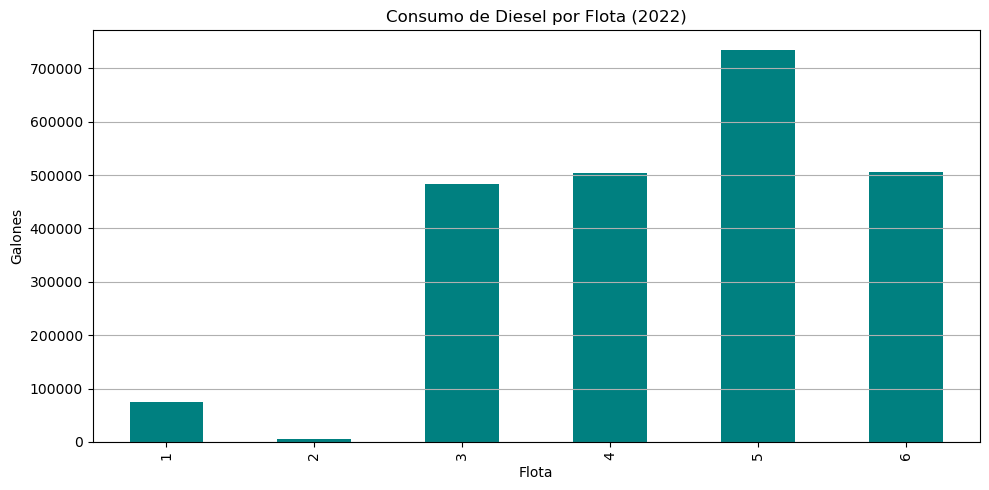

In [71]:
consumo_periodo_flota = consumo_periodo_2022.groupby('DISPENSADOR')['GALONES'].sum()
consumo_periodo_flota.plot(kind='bar', figsize=(10,5), color='teal')
plt.title('Consumo de Diesel por Flota (2022)')
plt.xlabel('Flota')
plt.ylabel('Galones')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [72]:
consumo_periodo_2023 = med_diesel.loc['2023-01-01':'2023-12-31']
consumo_periodo_2023.head()

,DISPENSADOR,HORA,VEHICULO,FLOTA,GALONES,KILOMETRAJE,ANIO
FECHA,,,,,,,
2023-01-01,5,13:50:00,V029,BI ARTICULADOS,53.022,318169.8,2023
2023-01-01,5,11:12:00,V072,BI ARTICULADOS,50.447,214350.8,2023
2023-01-01,5,13:20:00,S017,B12M,40.000,623553.6,2023
2023-01-01,5,11:48:00,V056,BI ARTICULADOS,38.101,385697.0,2023
2023-01-01,5,11:48:00,S021,B12M,30.114,622824.8,2023


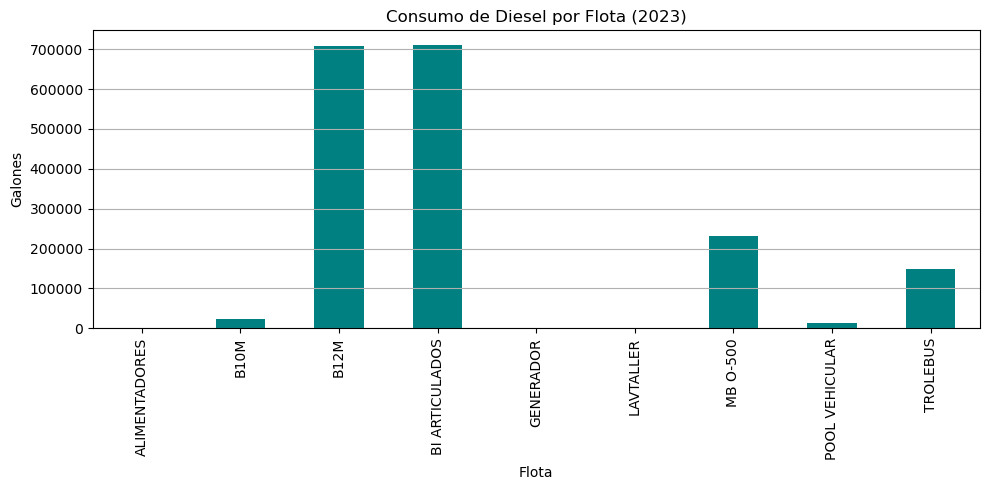

In [73]:
consumo_periodo_flota = consumo_periodo_2023.groupby('FLOTA')['GALONES'].sum()
consumo_periodo_flota.plot(kind='bar', figsize=(10,5), color='teal')
plt.title('Consumo de Diesel por Flota (2023)')
plt.xlabel('Flota')
plt.ylabel('Galones')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [74]:
consumo_por_flota = med_diesel.groupby([med_diesel.index.year, 'FLOTA'])['GALONES'].sum().unstack()


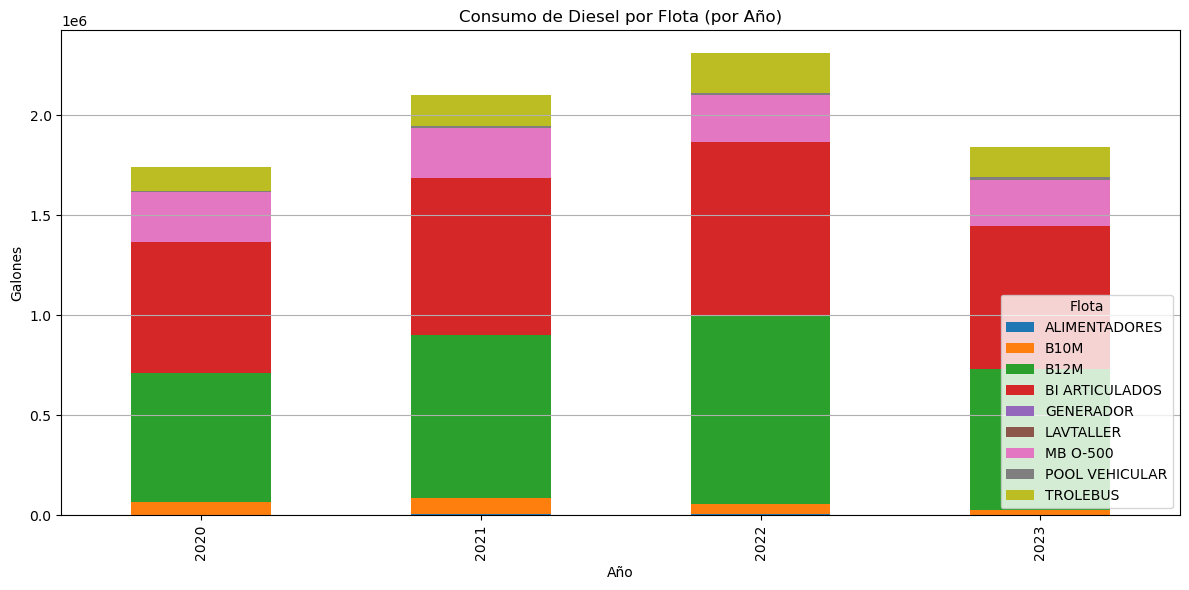

In [75]:
consumo_por_flota.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Consumo de Diesel por Flota (por Año)')
plt.xlabel('Año')
plt.ylabel('Galones')
plt.legend(title='Flota')
plt.grid(axis='y')
plt.tight_layout()
plt.show()